In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

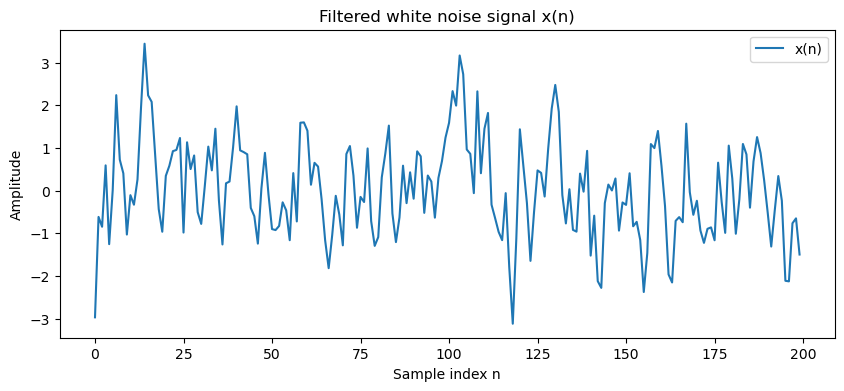

In [8]:
rng = np.random.default_rng()

# --- Parameters ---
N = 20000  # total number of samples
a = 0.5    # filter coefficient (change to match assignment if specified)

# --- Generate unit-variance white noise (Gaussian or Uniform) ---
w = rng.normal(0, 1, N)  # white Gaussian noise with mean 0, var 1
# alternatively, for uniform white noise:
# w = rng.uniform(-np.sqrt(3), np.sqrt(3), N)

# --- Define filter: x[n] = 0.9 * x[n-1] + w[n] ---
b = [1]       # numerator coefficients
a_coeffs = [1, -a]  # denominator coefficients (1 - 0.9z^-1)

x = sig.lfilter(b, a_coeffs, w)

# --- Plot to visualize ---
plt.figure(figsize=(10,4))
plt.plot(x[:200], label="x(n)")
plt.title("Filtered white noise signal x(n)")
plt.xlabel("Sample index n")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [9]:
# Assume x is the signal from Problem 2c:
# e.g., x = <your filtered Gaussian noise sequence of length 20000>
# Example placeholder:
# x = np.load("x_signal.npy")

K = 20                 # segment length
num_segments = 200     # number of mean estimates
segment_means = np.zeros(num_segments)

# compute 200 mean estimates from non-overlapping segments
for i in range(num_segments):
    start = i * K
    end = start + K
    segment = x[start:end]
    segment_means[i] = np.mean(segment)

print("First 10 mean estimates:", segment_means[:10])


First 10 mean estimates: [ 0.3128598   0.36151069  0.08175838 -0.17190619  0.15910286  0.52101596
  0.30723474 -0.52751167 -0.4910716  -0.28067791]


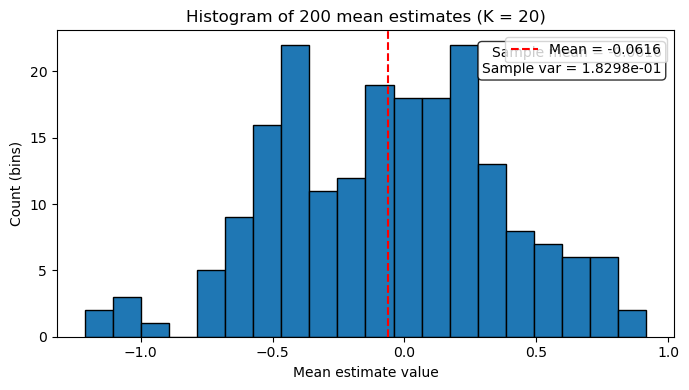

In [10]:
# --- If segment_means already exists in your workspace, this will use it.
# --- Otherwise the code below generates x(n) and computes segment_means.
try:
    segment_means
except NameError:
    # --- Generate x(n) (fallback) ---
    N = 20000
    # Example filter (replace if you have a different H(z)):
    a_coeff = 0.9                 # filter coefficient
    b = [1.0]                     # numerator
    a = [1.0, -a_coeff]           # denominator: 1 - a_coeff z^-1

    # unit-variance white Gaussian noise
    w = rng.normal(0, 1, N)
    x = sig.lfilter(b, a, w)

    # --- Compute 200 mean estimates from non-overlapping segments of length K=20 ---
    K = 20
    num_segments = 200
    segment_means = np.array([np.mean(x[i*K:(i+1)*K]) for i in range(num_segments)])

# --- Plot histogram with 20 bins ---
fig, ax = plt.subplots(figsize=(7,4))
n, bins, patches = ax.hist(segment_means, bins=20, edgecolor='black')
ax.set_title("Histogram of 200 mean estimates (K = 20)")
ax.set_xlabel("Mean estimate value")
ax.set_ylabel("Count (bins)")

# --- Show sample mean and variance of the estimates on the plot ---
mean_est = np.mean(segment_means)
var_est = np.var(segment_means, ddof=1)  # sample variance (unbiased)
ax.axvline(mean_est, color='r', linestyle='--', label=f"Mean = {mean_est:.4f}")
ax.legend(loc='upper right')

props = dict(boxstyle='round', facecolor='white', alpha=0.8)
textstr = f"Sample mean = {mean_est:.4f}\nSample var = {var_est:.4e}"
ax.text(0.98, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.show()


In [11]:
# assume x, segment_means, K already exist
# (from previous 3a/3b code)

# --- Empirical variance of the mean estimates ---
empirical_var = np.var(segment_means, ddof=1)

# --- Theoretical variance estimate based on autocorrelation ---
def mean_variance_theoretical(x, K):
    # unbiased autocorrelation estimate
    R = sig.correlate(x, x, mode='full') / len(x)
    mid = len(R)//2
    Rxx = R[mid:mid+K]  # from lag 0 to K-1

    # Compute double sum formula
    weights = np.arange(K, 0, -1)  # (K, K-1, ..., 1)
    var_theoretical = (2*np.sum(Rxx[1:]*weights[1:]) + K*Rxx[0]) / (K**2)
    return var_theoretical

theoretical_var = mean_variance_theoretical(x, K)

print(f"Empirical variance of mean estimates: {empirical_var:.5e}")
print(f"Theoretical variance of mean estimator: {theoretical_var:.5e}")
print(f"Ratio (empirical / theoretical): {empirical_var/theoretical_var:.3f}")


Empirical variance of mean estimates: 1.82977e-01
Theoretical variance of mean estimator: 1.81232e-01
Ratio (empirical / theoretical): 1.010
